In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
######################################## Data preparation #########################################
X2 = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
Y2 = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

In [3]:
######################## Prepare model data point for visualization ###############################
x = X2[:, 0]
y = X2[:, 1]
z = Y2

x_pred = np.linspace(0, np.max(x), 33)      # range of porosity values
y_pred = np.linspace(0, np.max(y), 33)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [4]:
################################################ Train #############################################
ols = linear_model.LinearRegression()
model = ols.fit(X2, Y2)
predicted = model.predict(model_viz)

In [5]:
############################################## Evaluate ############################################
r2 = model.score(X2, Y2)

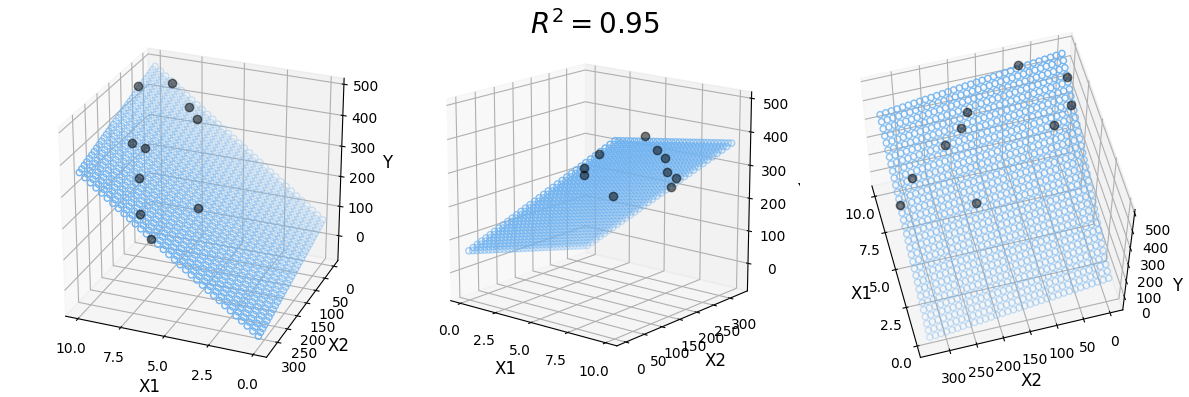

In [6]:
############################################## Plot ################################################
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

Credit:  
https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python#Multiple%20linear%20regression